## Image Argumentation

In [1]:
from imgaug import augmenters as iaa
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


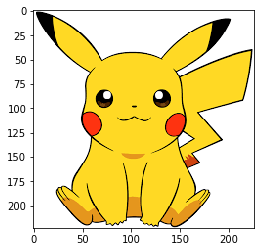

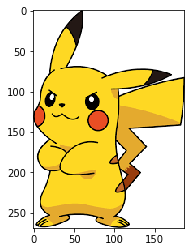

In [3]:
img1=image.load_img('img1.png')
img2=image.load_img('img2.png')

img1=image.img_to_array(img1)/255.0
img2=image.img_to_array(img2)/255.0

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [2]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.LinearContrast((0.75, 1.5)),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    ),
    iaa.PiecewiseAffine(scale=(0.01, 0.05))
])

In [5]:
import numpy as np
batch=img1.reshape((1,*img1.shape))
batch.shape

(1, 223, 226, 3)

In [6]:
output=seq(images=batch)
print(output.shape)

(1, 223, 226, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


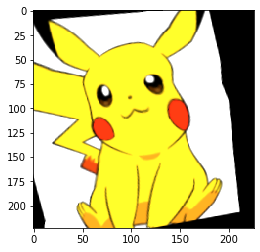

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


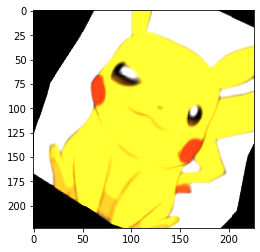

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


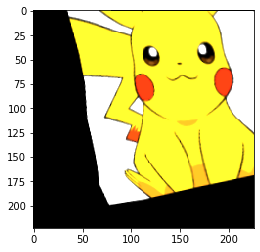

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


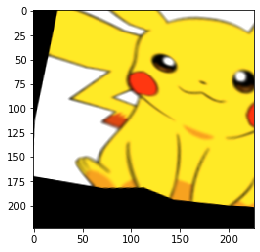

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


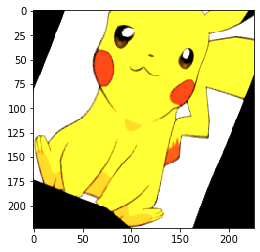

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


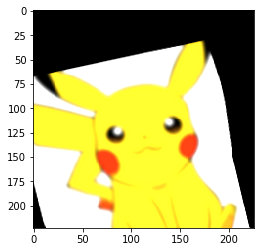

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


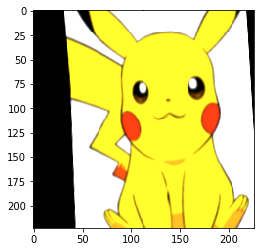

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


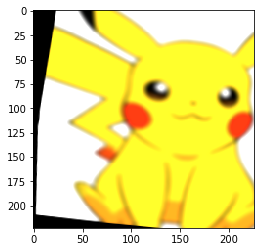

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


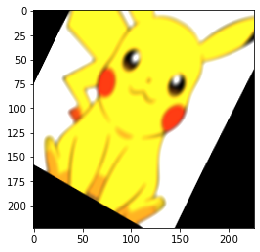

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


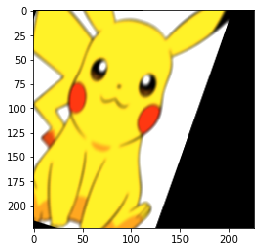

In [7]:
for i in range(10):
    output=seq(images=batch)
    
    plt.imshow(output[0])
    plt.show()

## Let's upload dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imgaug import augmenters as iaa
from keras.preprocessing import image

In [9]:
import os
folder=os.listdir("Pokemon-CNN-master/dataset")

In [10]:

for f in folder:
    path="Pokemon-CNN-master/dataset/"+f
    print(f,": "+str(len(os.listdir(path))))
    

bulbasaur : 209
charmander : 214
mewtwo : 215
pikachu : 210
squirtle : 200


In [62]:

import os,shutil
folders=os.listdir('Pokemon-CNN-master/')
os.mkdir('Pokemon-CNN-master/val_images')
if not os.path.isdir('val_images'):
    os.mkdir('val_images')

In [63]:
classes=['bulbasaur','charmander','mewtwo','pikachu','squirtle']
for c in classes:
    p=os.path.join('Pokemon-CNN-master/val_images/',c)
    os.mkdir(p)
    if not p:
        os.mkdir(p)

In [64]:
SPLIT=0.9
for f in os.listdir('Pokemon-CNN-master/dataset/'):
    path='Pokemon-CNN-master/dataset/'+f
    imgs=os.listdir(path)
    split_size=int(SPLIT*len(imgs))
    files_to_move=imgs[split_size:]
    print(len(files_to_move))
    for img_f in files_to_move:
        src=os.path.join(path,img_f)
        dest=os.path.join('Pokemon-CNN-master/val_images/'+f+"/",img_f)
        
        shutil.move(src,dest)
        

24
24
24
24
23


In [65]:
for f in folder:
    path="Pokemon-CNN-master/dataset/"+f
    print(f,": "+str(len(os.listdir(path))))
    

bulbasaur : 209
charmander : 214
mewtwo : 215
pikachu : 210
squirtle : 200


In [24]:

from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1.0/255)# rescale the image by dividing pixle by 255
train_generator=train_gen.flow_from_directory(
    "Pokemon-CNN-master/dataset/",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
val_gen=ImageDataGenerator(rescale=1.0/255)# rescale the image by dividing pixle by 255
val_generator=val_gen.flow_from_directory(
    "Pokemon-CNN-master/val_images/",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 1047 images belonging to 5 classes.
Found 119 images belonging to 5 classes.


In [5]:

X,y=train_generator.next()[0].shape,train_generator.next()[1].shape
X,y

C:\Users\J P PANDEY\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


((32, 150, 150, 3), (32, 5))

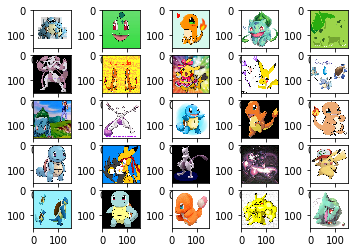

In [5]:
for x,y in train_generator:
   
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x[i])
    plt.show()
    break

## Without Gobal Average pooling and Argumentation

In [25]:

from keras.layers import *
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))# no of output classes is 4
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [26]:
from keras import optimizers
adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [27]:
history=model.fit_generator(
     train_generator,
     epochs=20,
     steps_per_epoch= 32,
     validation_data=val_generator,
     validation_steps=4,
      

     
 )

Epoch 1/20
 2/32 [>.............................] - ETA: 1:20 - loss: 1.5808 - acc: 0.3906

C:\Users\J P PANDEY\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


32/32 [==============================] - 56s 2s/step - loss: 1.4987 - acc: 0.4030 - val_loss: 1.3080 - val_acc: 0.4622
Epoch 2/20
32/32 [==============================] - 54s 2s/step - loss: 1.0068 - acc: 0.6512 - val_loss: 1.0647 - val_acc: 0.7479
Epoch 3/20
32/32 [==============================] - 54s 2s/step - loss: 0.6570 - acc: 0.7852 - val_loss: 0.7722 - val_acc: 0.7899
Epoch 4/20
32/32 [==============================] - 54s 2s/step - loss: 0.4724 - acc: 0.8525 - val_loss: 0.7264 - val_acc: 0.7731
Epoch 5/20
32/32 [==============================] - 50s 2s/step - loss: 0.3966 - acc: 0.8748 - val_loss: 0.7084 - val_acc: 0.8151
Epoch 6/20
32/32 [==============================] - 56s 2s/step - loss: 0.3821 - acc: 0.8788 - val_loss: 1.1500 - val_acc: 0.7815
Epoch 7/20
32/32 [==============================] - 53s 2s/step - loss: 0.3365 - acc: 0.8906 - val_loss: 0.3883 - val_acc: 0.7899
Epoch 8/20
32/32 [==============================] - 53s 2s/step - loss: 0.3483 - acc: 0.8946 - val_lo

## Data Argumentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

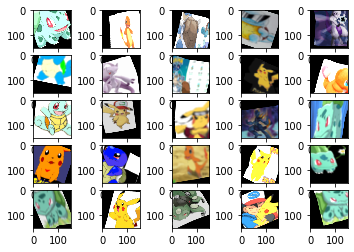

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

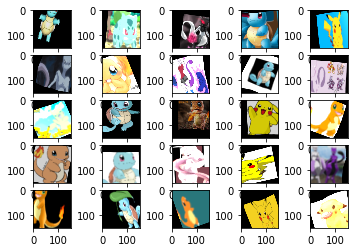

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

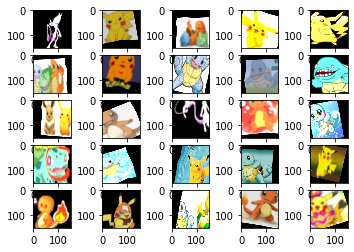

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

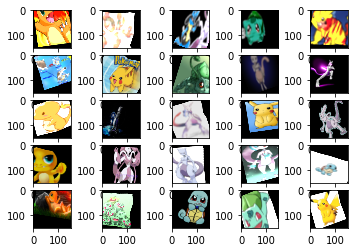

In [29]:
for i,(x,y) in enumerate(train_generator):
    x=seq(images=x)
    for j in range(25):
        plt.subplot(5,5,j+1)
        plt.imshow(x[j])
    plt.show()
    if (i==3):
        break

# With Gobal Average pooling and Argumentation


In [30]:
from keras.layers import *
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))# no of output classes is 4
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [31]:
from keras import optimizers
adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [33]:
history=model.fit_generator(
     train_generator,
     epochs=20,
     steps_per_epoch= 32,
     validation_data=val_generator,
     validation_steps=4,
      

     
 )

Epoch 1/20
32/32 [==============================] - 55s 2s/step - loss: 1.5737 - acc: 0.3438 - val_loss: 1.5495 - val_acc: 0.2605
Epoch 2/20
32/32 [==============================] - 55s 2s/step - loss: 1.4415 - acc: 0.4374 - val_loss: 1.2747 - val_acc: 0.5798
Epoch 3/20
32/32 [==============================] - 53s 2s/step - loss: 1.1617 - acc: 0.5537 - val_loss: 1.0313 - val_acc: 0.5882
Epoch 4/20
32/32 [==============================] - 54s 2s/step - loss: 0.9445 - acc: 0.6484 - val_loss: 0.9361 - val_acc: 0.7143
Epoch 5/20
32/32 [==============================] - 51s 2s/step - loss: 0.7594 - acc: 0.7197 - val_loss: 0.7229 - val_acc: 0.7395
Epoch 6/20
32/32 [==============================] - 54s 2s/step - loss: 0.6531 - acc: 0.7655 - val_loss: 0.4453 - val_acc: 0.6807
Epoch 7/20
32/32 [==============================] - 54s 2s/step - loss: 0.6105 - acc: 0.7754 - val_loss: 0.6033 - val_acc: 0.7563
Epoch 8/20
32/32 [==============================] - 53s 2s/step - loss: 0.5669 - acc: 0.82